Metoda hlavních komponent - principal component analysis (PCA)
-------------------------
Základní otázky otázka potřebnosti dalšího parametru - jaký nejmenší počet proměnných vysvětluje dostatečně data?

Matice $A$ popisuje transformaci (rotaci/inverzi) měřených veličin
$$Y=A X$$

- hledáme takovou kombinaci $a_1 X$, kdy $V(a_1 X)$ bude největší za vhodné normalizační podmínky $a_1^T a_1=1$ &rarr; _první hlavní komponenta_
- pak hledáme takovou kombinaci $a_2 X$ , kdy $V(a_2 X)$ bude největší za podmínky $a_2^T a_2=1$ a $Cov(a_1 X, a_2 X)=0$  &rarr; _druhá hlavní komponenta_
- pokračujeme dále vždy ve zbývajícím prostoru kolmém na předchozí komponenty

Proměnné $X$ (jednotlivé vektory) mají kovarianční matici $\Sigma$

Praktické řešení: najdeme vlastní čísla $\lambda_i$ a vlastní vektory $\pi_i$ kovar. matice, předpokládáme, že budou ortogonální (autom. splněno, pokud jsou vlastní čísla různá).

Matice $W$ vlastních vektorů matice $X^T X$ a sdružená matice $V$ vlastních vektorů matice $X X^T$
(ident. v případě čtvercové matice X) jsou transformačními maticemi **singulární dekompozice** matice X ve tvaru $X=W L V$, kde L je matice pouze s diagonálními nezápornými elementy.

Stopa kovar. matice je při transformaci zachována - součet variancí je součtem vlastních čísel. Vlastní vektory obvykle uspořádáme podle velikosti vlast. čísel.

#### Reference:
[Francis] Paul J. Francis, Beverley J. Wills <http://arxiv.org/abs/astro-ph/9905079> + [code ref.](http://www.mso.anu.edu.au/~pfrancis/pca_public.f)

![2variables](http://is.muni.cz/el/1431/podzim2018/FX003/um/prezen/images/pca_2var.png)

Příklad
---------------------

kombinujeme 5 funkcí: konstanta, lineární, sinusoida, gaussovka

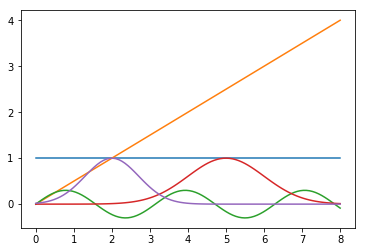

In [1]:
%matplotlib inline
from matplotlib import pyplot as pl
import numpy as np
x=np.r_[0:8:100j]
fun=[np.ones_like(x),0.5*x]#0.05*x**2]
fun.append(0.3*np.sin(x*2.))
fun.append(np.exp(-(x-5)**2/2.))
fun.append(np.exp(-(x-2)**2))
nmeas=20
[pl.plot(x,f) for f in fun]
allpars=np.array([np.random.normal(a,0.4*abs(a),size=nmeas) for a in [3,-1,1.5,2,3.1]]) #sada ruznych koefientu jednotlivych komponent

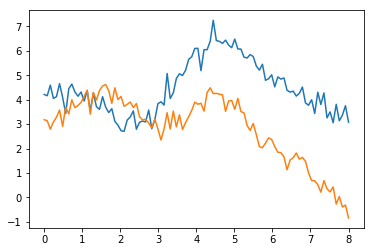

In [2]:
testfunc=allpars.T.dot(fun)
for i in range(len(testfunc)):
    testfunc[i]+=np.random.normal(0,0.3,size=len(x))
pl.plot(x,testfunc[3])
pl.plot(x,testfunc[1])

In [3]:
ncomp=4
renfunc4=testfunc[:ncomp]-testfunc[:ncomp].mean(1)[:,np.newaxis]
renfunc4/=np.sqrt(((renfunc4**2).sum(1)/(len(x)-1))[:,np.newaxis])
cormat4=renfunc4.dot(renfunc4.T)
eig4,vecs4=np.linalg.eig(cormat4)
eig4

array([278.38631903, 107.52010322,   5.40402942,   4.68954832])

Transformujeme standardizované proměnné $z$ pomocí matice $y=V z$

Nové proměnné jsou ortogonální, korelační matice $D=V^T\ R\ V$, kde $R=z^T\ z$ je kovarianční (korelační) matice standardizovaných prom. 

Chceme maximalizovat diagonální elementy, za normalizační podmínky $v^T v=1$, pomocí Lagrangeova multiplikátoru řešíme

$$\partial (V^T\ R\ V -\lambda(v^T v-1)) /\partial v=0$$ odkud vyjde rovnice pro vlast. čísla

$(R - \lambda\ \mathbb{I}) v = 0$  

### cela matice

In [4]:
renfunc=testfunc-testfunc.mean(1)[:,np.newaxis]
renfunc/=np.sqrt((renfunc**2).sum(1))[:,np.newaxis]
#renfunc*=(len(x)-1)
cormat=renfunc.dot(renfunc.T)
eig,vecs=np.linalg.eig(cormat)
eig

array([1.62786451e+01, 2.32090173e+00, 6.29519299e-01, 1.50119041e-01,
       1.03263348e-01, 9.57252513e-02, 6.62150369e-02, 5.10838522e-02,
       4.67303490e-02, 9.54218490e-03, 1.23222916e-02, 1.47232863e-02,
       1.64858358e-02, 1.77981932e-02, 2.04542722e-02, 4.16255903e-02,
       2.68658635e-02, 2.99922881e-02, 3.35723504e-02, 3.44148285e-02])

In [5]:
a=renfunc[0]
(a**2).sum(),a.sum()

(1.0, 2.498001805406602e-16)

In [6]:
varlist=[v.dot(renfunc).std() for v in vecs.T]
cumlist=np.cumsum(varlist)
np.where(1-cumlist/cumlist[-1]<.10)[0][0] #kolik potrebujeme funkci k vysvetleni 90% variability

14

In [7]:
# ortonormalni vlastni vektory
np.all(np.isclose(vecs.T@vecs,np.eye(len(eig))))

True

In [167]:
qlim=9
recon=vecs.T[:,:qlim].dot(compon[:qlim])
#comnorm

In [66]:
compon=vecs.dot(renfunc)
comnorm=np.sqrt((compon**2).sum(1))
#compon/=comnorm[:,np.newaxis]
compon[0].dot(renfunc[0])

36.46679194885487

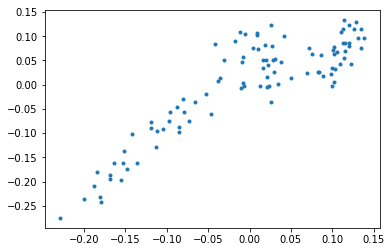

In [8]:
pl.plot(renfunc[0],renfunc[1],'.')

[[<matplotlib.lines.Line2D at 0x23e9fbd7940>],

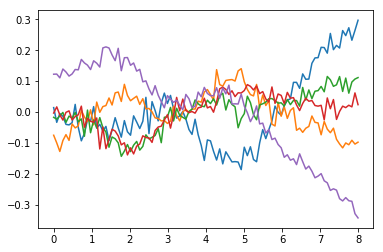

In [9]:
[pl.plot(x,v.dot(renfunc)) for v in vecs[:5]]

In [15]:
eig2,vecs2=np.linalg.eig(renfunc.T.dot(renfunc))
vecs2[:5].dot(renfunc[3])

array([-0.06402871-0.00415379j, -0.22471942+0.00487112j,
        0.08358843-0.00154518j,  0.03901550+0.00481319j,
        0.02791199-0.00195391j])

In [10]:
# funkce z knihovny pro Machine learning
from sklearn.decomposition import PCA
zca=PCA(4)
op1=zca.fit(renfunc[:10])
zca.explained_variance_ratio_

array([0.81492937, 0.06170513, 0.0320817 , 0.03041386])

In [195]:
[zca.components_.dot(r) for r in renfunc[:3]]

[array([ 0.03652131,  0.22300082, -0.45227578,  0.07291475]),
 array([ 0.05730909, -0.03768623, -0.38829991, -0.11200899]),
 array([ 0.47405738,  0.04763066, -0.29688383, -0.07454835])]

In [11]:
cormat10=renfunc[:10].dot(renfunc[:10].T)
eig10,vecs10=np.linalg.eig(cormat10)
eig10

array([8.4569873 , 1.21942116, 0.08641346, 0.06694519, 0.05466067,
       0.03905417, 0.0124432 , 0.01729072, 0.02478818, 0.02199595])

[[<matplotlib.lines.Line2D at 0x23ea1da0198>],

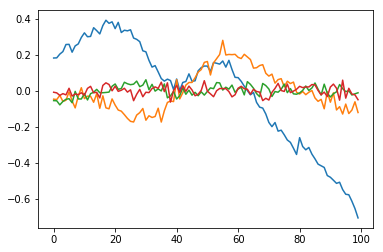

In [12]:
prinfunc=vecs10.T.dot(renfunc[:10])
[pl.plot(p) for p in prinfunc[:4]]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

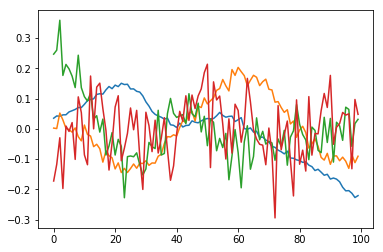

In [240]:
#vazene funkce (hlavni faktory)
#prinfuncz=vecs10.T.dot(np.eye(10)/np.sqrt(eig10)).dot(renfunc[:10])
prinfuncw=((np.eye(10)/np.sqrt(eig10)).dot(prinfunc))
ix=np.r_[:100]
[pl.plot(ix,prinfuncw[:4][i]) for i in range(4)]
(prinfuncw**2).sum(1) #normalizovany rozptyl

In [243]:
selsrt=np.argsort(eig10)[::-1]
selsrt

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

[[<matplotlib.lines.Line2D at 0x1c4ad8b02b0>],

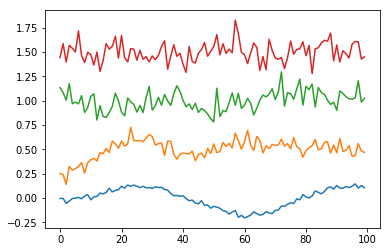

In [176]:
[pl.plot(z+i*0.5) for i,z in enumerate(zca.components_)]

In [152]:
np.isclose(np.corrcoef(zca.components_),np.eye(4))

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [155]:
pok=zca.transform(renfunc4)

jina sada (vetsi rozptyl)

In [252]:
allparsb=np.array([np.random.normal(a,0.8*abs(a),size=nmeas) for a in [3,-1,1.5,2,3.1]])
testfuncb=allparsb.T.dot(fun)
for i in range(len(testfuncb)):
    testfuncb[i]+=np.random.normal(0,0.3,size=len(x))


In [253]:
renfuncb=testfuncb-testfuncb.mean(1)[:,np.newaxis]
renfuncb/=np.sqrt((renfuncb**2).sum(1))[:,np.newaxis]
#renfunc*=(len(x)-1)
cormat10b=renfuncb[:10].dot(renfuncb[:10].T)
eig10b,vecs10b=np.linalg.eig(cormat10b)
eig10b

array([7.17639155, 1.31621008, 0.99361766, 0.26815905, 0.09653689,
       0.06328717, 0.03720114, 0.0101432 , 0.01857632, 0.01987694])

In [247]:
eig10

array([8.59500793, 0.99575257, 0.15153533, 0.08263844, 0.05394354,
       0.03659283, 0.02871133, 0.02259443, 0.01911106, 0.01411255])

[[<matplotlib.lines.Line2D at 0x1c4aee732b0>],

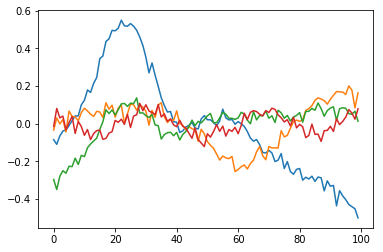

In [254]:
prinfuncb=vecs10b.T.dot(renfuncb[:10])
[pl.plot(p) for p in prinfuncb[:4]]

In [251]:
(eig10/eig10.sum())/(eig[:10]/eig.sum())

array([0.97880204, 1.42064981, 0.68482739, 1.27804085, 1.55743719,
       1.3707569 , 1.15159393, 1.08757574, 0.98514387, 0.87712246])

In [256]:
def regen(shift=0,fluct=0.4,noise=0.3,mabs=False,nmeas=10):
    allparsb=np.array([np.random.normal(a+shift,fluct*abs(a),size=nmeas) for a in [3,-1,1.5,2,3.1]])
    if mabs: allparsb=abs(allparsb)
    testfuncb=allparsb.T.dot(fun)
    for i in range(len(testfuncb)):
        testfuncb[i]+=np.random.normal(0,noise,size=len(x))
    renfuncb=testfuncb-testfuncb.mean(1)[:,np.newaxis]
    renfuncb/=np.sqrt((renfuncb**2).sum(1))[:,np.newaxis]
    #renfunc*=(len(x)-1)
    cormat10b=renfuncb.dot(renfuncb.T)
    eig10b,vecs10b=np.linalg.eig(cormat10b)
    return eig10b,vecs10b.T.dot(renfuncb)
eigc,princ=regen(-2,0.8,mabs=True)